In [1]:
from gurobipy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n=11
clients = [i for i in range(n) if i!=0]
nodes = [0]+clients
arcs = [(i,j) for i in nodes for j in nodes if i!=j]

np.random.seed(0)
q={n:np.random.randint(10,15) for n in clients}
q[0]=0
Q=50

X = np.random.rand(len(nodes))*100
Y = np.random.rand(len(nodes))*100

In [3]:
distances = {(i,j): np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in nodes for j in nodes if i!=j}

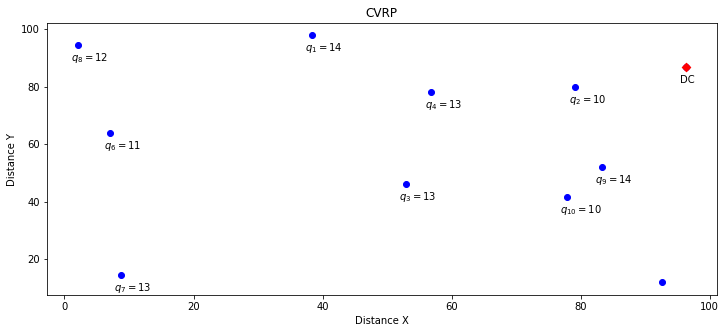

In [4]:
plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

plt.scatter(X[0],Y[0],color='red',marker='D')
plt.annotate("DC",(X[0]-1,Y[0]-5.5))

for i in clients:
    plt.annotate('$q_{%d}=%d$'%(i,q[i]),(X[i]-1,Y[i]-5.5))
    
plt.xlabel("Distance X")
plt.ylabel("Distance Y")
plt.title("CVRP")

plt.show()

In [5]:
model = Model("CVRP")

x= model.addVars(arcs,vtype=GRB.BINARY,name='x')
u= model.addVars(clients,ub=Q,vtype=GRB.CONTINUOUS,name='u')

model.setObjective(quicksum(distances[i,j]*x[i,j] for i,j in arcs),GRB.MINIMIZE)

model.addConstrs(quicksum(x[i,j] for j in nodes if j!=i)==1 for i in clients)
model.addConstrs(quicksum(x[i,j] for i in nodes if j!=i)==1 for j in clients)

model.addConstrs((x[i,j]==1) >> (u[i]+q[j]==u[j]) for i,j in arcs if j!=0 and i!=0)
model.addConstrs(u[i]>=q[i] for i in clients)
                 
#model.Params.timelimit = 60
#model.Params.MIPGap = 0.1
                 
model.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-18
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 30 rows, 120 columns and 210 nonzeros
Model fingerprint: 0x2937749c
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 1e+02]
  Bounds range     [1e+00, 5e+01]
  RHS range        [1e+00, 1e+01]
  GenCon rhs range [1e+01, 1e+01]
  GenCon coe range [1e+00, 1e+00]
Presolve added 189 rows and 12 columns
Presolve time: 0.02s
Presolved: 219 rows, 132 columns, 1324 nonzeros
Variable types: 42 continuous, 90 integer (90 binary)
Found heuristic solution: objective 1280.3265678

Root relaxation: objective 3.465773e+02, 52 iterations, 0.00 seconds (

In [6]:
print("Function objective", str(round(model.ObjVal,2)))
for v in model.getVars():
    if v.x >0.9:
        print(str(v.VarName)+"="+str(v.x))

Function objective 565.99
x[0,4]=1.0
x[0,7]=1.0
x[0,9]=1.0
x[1,0]=1.0
x[2,0]=1.0
x[3,0]=1.0
x[4,2]=1.0
x[5,3]=1.0
x[6,8]=1.0
x[7,6]=1.0
x[8,1]=1.0
x[9,10]=1.0
x[10,5]=1.0
u[1]=50.0
u[2]=22.999999999999694
u[3]=50.0
u[4]=13.0
u[5]=37.000000000000234
u[6]=23.99999999999968
u[7]=13.0
u[8]=36.00000000000032
u[9]=14.0
u[10]=24.000000000000256


In [7]:
routes = list()
for i in clients:
    if x[(0,i)].x > 0.9:
        aux=[0,i]
        while i!=0:
            j=i
            for k in nodes:
                if j!=k and x[(j,k)].x >0.9:
                    aux.append(k)
                    i=k
        routes.append(aux)
routes

[[0, 4, 2, 0], [0, 7, 6, 8, 1, 0], [0, 9, 10, 5, 3, 0]]

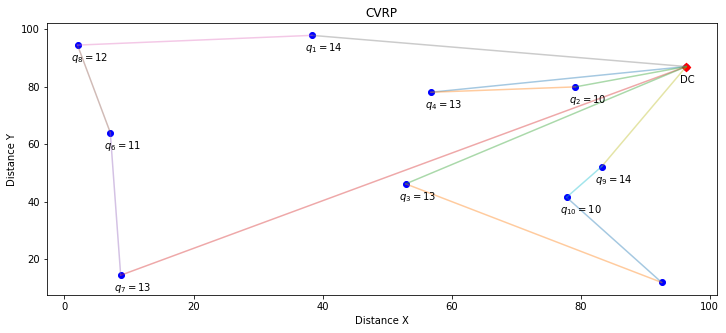

In [8]:
plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')
plt.scatter(X[0],Y[0],color='red',marker='D')
plt.annotate("DC",(X[0]-1,Y[0]-5.5))

for i in clients:
    plt.annotate('$q_{%d}=%d$'%(i,q[i]),(X[i]-1,Y[i]-5.5))

for r in range(len(routes)):
    for n in range(len(routes[r])-1):
        i=routes[r][n]
        j=routes[r][n+1]
        plt.plot([X[i],X[j]],[Y[i],Y[j]],alpha=0.4)
    
plt.xlabel("Distance X")
plt.ylabel("Distance Y")
plt.title("CVRP")

plt.show()